# Product Analyzer: Automated Sentiment Analysis of Customer Reviews

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import nltk
from warnings import filterwarnings
filterwarnings("ignore")

# Data Ingestion

In [3]:
A=pd.read_csv("D:Hitesh/dataset/Reviews/Dataset.csv")

In [4]:
A

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Drop Duplicates

In [5]:
A.drop_duplicates(inplace=True)

In [6]:
A

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Exploratory Data Analysis

In [7]:
A.sentiment.value_counts()

positive    24881
negative    24696
Name: sentiment, dtype: int64

<Axes: ylabel='sentiment'>

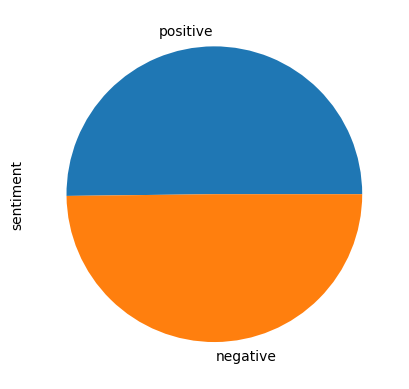

In [8]:
A.sentiment.value_counts().plot(kind="pie")

# Text Preprocessing

In [9]:
B=A["review"]

In [10]:
B

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 49577, dtype: object

## i) Lowercasing

In [11]:
B=B.str.lower() 

In [12]:
B

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49577, dtype: object

## ii) Removing tags

In [13]:
from hiteshmodule import removeTags

In [14]:
B=B.apply(removeTags)

In [15]:
B

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49577, dtype: object

## iii) Removing punctuations (except full stop)

In [16]:
from hiteshmodule import removeUnwanted

In [17]:
B=B.apply(removeUnwanted)

In [18]:
B

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis "love in the time of money" is ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49577, dtype: object

## iv) Removing stop words

In [19]:
from hiteshmodule import removeSW
#nltk.download('stopwords')

In [20]:
B=B.apply(removeSW)

In [21]:
B

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production. filming technique...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis "love time money" visually stun...
                               ...                        
49995    thought movie right good job. wasnt creative o...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49577, dtype: object

In [22]:
A["review"]=B

# Feature Extraction 

## *Heuristic Approach*

In [33]:
A.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,"petter matteis ""love time money"" visually stun...",positive


### Number of characters

In [34]:
A['review'].apply(len)

0        1185
1         668
2         601
3         475
4         880
         ... 
49995     567
49996     406
49997     843
49998     853
49999     437
Name: review, Length: 49577, dtype: int64

In [35]:
A["characters"]=A['review'].apply(len)

In [36]:
A.head()

,review,sentiment,characters
0,one reviewers mentioned watching 1 oz episode ...,positive,1185
1,wonderful little production. filming technique...,positive,668
2,thought wonderful way spend time hot summer we...,positive,601
3,basically theres family little boy jake thinks...,negative,475
4,"petter matteis ""love time money"" visually stun...",positive,880


### Number of words

In [37]:
def words(A):
    words=[]
    for i in A:
        a=nltk.word_tokenize(i)
        b=len(a)
        words.append(b)
    return words
        

In [38]:
#nltk.download('punkt')

In [39]:
A["words"]=words(A["review"])

In [40]:
A.head()

,review,sentiment,characters,words
0,one reviewers mentioned watching 1 oz episode ...,positive,1185,186
1,wonderful little production. filming technique...,positive,668,93
2,thought wonderful way spend time hot summer we...,positive,601,96
3,basically theres family little boy jake thinks...,negative,475,73
4,"petter matteis ""love time money"" visually stun...",positive,880,136


In [41]:
p=open("positive-words.txt","r")
p=p.read()
positive = p.split()

In [42]:
positive

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [32]:
len(positive)

2006

In [33]:
positive_score=[]
for j in B:
    ps=[]
    for i in j.split():
        p=0
        if i in positive:
            p+=1
        else:
            continue
        ps.append(p)
        a=sum(ps)
    positive_score.append(a)

In [34]:
positive_score

[11,
 11,
 10,
 2,
 13,
 5,
 7,
 8,
 3,
 4,
 6,
 7,
 15,
 3,
 2,
 4,
 4,
 2,
 2,
 8,
 12,
 7,
 4,
 13,
 5,
 9,
 21,
 6,
 5,
 15,
 5,
 11,
 5,
 19,
 15,
 14,
 1,
 11,
 5,
 13,
 6,
 17,
 3,
 8,
 9,
 12,
 5,
 1,
 24,
 5,
 14,
 18,
 4,
 2,
 8,
 9,
 3,
 6,
 29,
 22,
 8,
 2,
 6,
 2,
 8,
 9,
 19,
 7,
 3,
 8,
 5,
 14,
 7,
 5,
 8,
 6,
 9,
 20,
 8,
 6,
 4,
 2,
 7,
 15,
 15,
 3,
 12,
 1,
 4,
 8,
 6,
 4,
 16,
 9,
 5,
 5,
 8,
 7,
 2,
 21,
 3,
 14,
 8,
 18,
 6,
 11,
 5,
 7,
 5,
 7,
 2,
 6,
 3,
 4,
 9,
 4,
 11,
 2,
 2,
 14,
 14,
 13,
 7,
 6,
 1,
 6,
 17,
 3,
 13,
 5,
 12,
 13,
 4,
 4,
 7,
 22,
 2,
 6,
 16,
 12,
 12,
 5,
 14,
 3,
 8,
 15,
 8,
 15,
 4,
 6,
 4,
 4,
 3,
 9,
 3,
 1,
 33,
 12,
 8,
 6,
 5,
 7,
 7,
 8,
 10,
 1,
 8,
 2,
 7,
 12,
 9,
 5,
 29,
 11,
 6,
 6,
 11,
 18,
 17,
 2,
 9,
 5,
 28,
 5,
 3,
 9,
 16,
 4,
 11,
 10,
 8,
 27,
 6,
 2,
 1,
 4,
 9,
 5,
 18,
 4,
 4,
 11,
 15,
 7,
 4,
 9,
 3,
 8,
 2,
 5,
 37,
 3,
 7,
 3,
 5,
 16,
 5,
 1,
 24,
 4,
 2,
 8,
 17,
 7,
 18,
 9,
 6,
 13,
 18,
 5,
 1,
 2,


In [35]:
n=open("negative-words.txt","r")
n=n.read()
negative = n.split()

In [36]:
negative

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [37]:
len(negative)

4783

In [38]:
negative_score=[]
for j in B:
    ns=[]
    for i in j.split():
        p=0
        if i in negative:
            p+=1
        else:
            continue
        ns.append(p)
        a=sum(ns)
    negative_score.append(a)

In [39]:
negative_score

[17,
 1,
 4,
 6,
 2,
 1,
 1,
 10,
 7,
 1,
 5,
 9,
 10,
 1,
 1,
 7,
 8,
 9,
 3,
 4,
 22,
 15,
 2,
 12,
 4,
 5,
 14,
 7,
 8,
 30,
 25,
 17,
 6,
 16,
 15,
 16,
 9,
 20,
 3,
 12,
 4,
 2,
 6,
 9,
 3,
 3,
 2,
 3,
 17,
 10,
 8,
 24,
 5,
 5,
 14,
 8,
 9,
 6,
 26,
 9,
 5,
 7,
 7,
 3,
 8,
 16,
 22,
 3,
 1,
 8,
 9,
 8,
 8,
 8,
 7,
 4,
 15,
 27,
 7,
 7,
 3,
 6,
 11,
 26,
 11,
 9,
 12,
 4,
 10,
 17,
 17,
 6,
 3,
 3,
 1,
 13,
 8,
 9,
 9,
 11,
 7,
 22,
 3,
 38,
 5,
 5,
 1,
 17,
 6,
 1,
 4,
 8,
 3,
 1,
 16,
 2,
 6,
 5,
 4,
 9,
 1,
 9,
 7,
 5,
 9,
 7,
 21,
 6,
 6,
 2,
 2,
 8,
 5,
 3,
 5,
 14,
 1,
 6,
 6,
 6,
 19,
 15,
 19,
 19,
 13,
 6,
 5,
 9,
 5,
 15,
 1,
 5,
 6,
 8,
 7,
 4,
 37,
 3,
 5,
 3,
 4,
 9,
 6,
 4,
 5,
 2,
 4,
 21,
 5,
 16,
 6,
 2,
 9,
 6,
 16,
 12,
 7,
 47,
 8,
 13,
 5,
 4,
 26,
 10,
 2,
 7,
 18,
 7,
 8,
 37,
 20,
 29,
 4,
 1,
 4,
 8,
 10,
 7,
 11,
 2,
 1,
 3,
 17,
 17,
 13,
 13,
 7,
 8,
 2,
 3,
 12,
 4,
 6,
 5,
 5,
 12,
 6,
 5,
 12,
 1,
 2,
 10,
 1,
 11,
 4,
 8,
 14,
 9,
 26,
 1,
 4,
 1,
 

In [40]:
A["positiveWords"]=positive_score
A["negativeWords"]=negative_score

In [45]:
a=A["sentiment"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a1=le.fit_transform(a)
A["target"]=a1

In [42]:
A

,review,sentiment,characters,words,positiveWords,negativeWords,target
0,one reviewers mentioned watching 1 oz episode ...,positive,1185,186,11,17,1
1,wonderful little production. filming technique...,positive,668,93,11,1,1
2,thought wonderful way spend time hot summer we...,positive,601,96,10,4,1
3,basically theres family little boy jake thinks...,negative,475,73,2,6,0
4,"petter matteis ""love time money"" visually stun...",positive,880,136,13,2,1
...,...,...,...,...,...,...,...
49995,thought movie right good job. wasnt creative o...,positive,567,95,13,1,1
49996,bad plot bad dialogue bad acting idiotic direc...,negative,406,60,3,12,0
49997,catholic taught parochial elementary schools n...,negative,843,129,4,11,0
49998,im going disagree previous comment side maltin...,negative,853,126,6,14,0


### Correlation

In [43]:
A.corr()

,characters,words,positiveWords,negativeWords,target
characters,1.000000,0.993916,0.796172,0.775914,0.023243
words,0.993916,1.000000,0.790189,0.770938,0.009696
positiveWords,0.796172,0.790189,1.000000,0.539134,0.207648
negativeWords,0.775914,0.770938,0.539134,1.000000,-0.158624
target,0.023243,0.009696,0.207648,-0.158624,1.000000


### Heatmap

<Axes: >

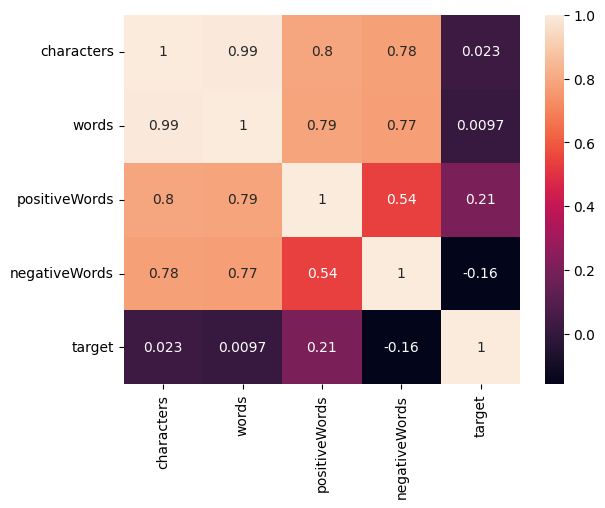

In [44]:
sb.heatmap(A.corr(),annot=True)

### <h2 style="background-color:yellow; color:Black;">Among all the heuristic features created positive words and negative words have some correlation with sentiment. </h2>

### Number of characters under particular sentiment

#### Under Positive sentiment

<Axes: xlabel='characters', ylabel='Count'>

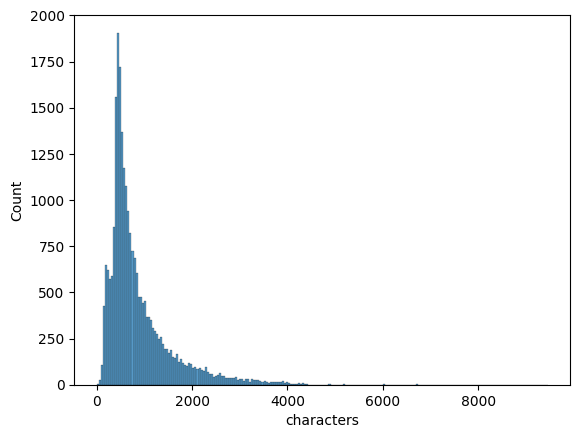

In [45]:
sb.histplot(A[A["target"]==1]["characters"])

#### Under Negative sentiment

<Axes: xlabel='characters', ylabel='Count'>

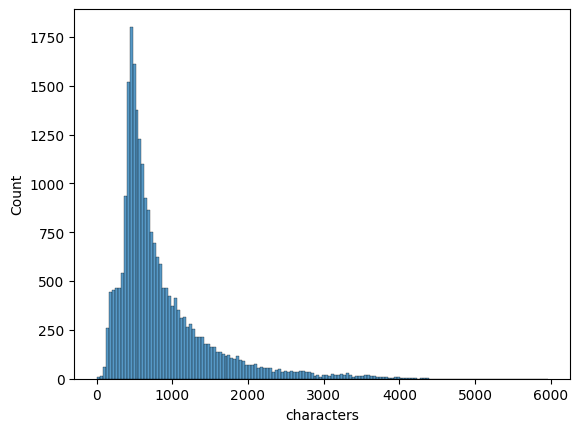

In [46]:
sb.histplot(A[A["target"]==0]["characters"])

#### Comparison

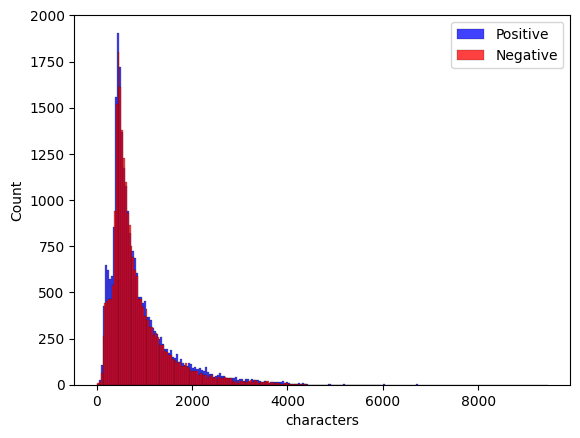

In [47]:
sb.histplot(A[A["target"]==1]["characters"],color="blue")
sb.histplot(A[A["target"]==0]["characters"],color="red")
plt.legend(("Positive","Negative"))

### <h2 style="background-color:yellow; color:Black;">The distribution of the characters under both the sentiment seems to be nearly equivalent</h2>

### Number of words under particular sentiment

#### Under Positive Sentiment

<Axes: xlabel='words', ylabel='Count'>

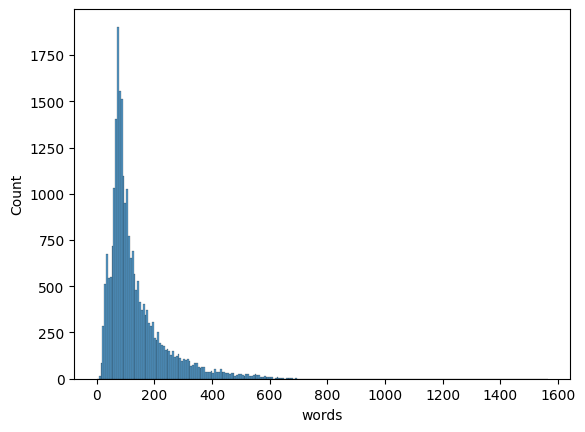

In [48]:
sb.histplot(A[A["target"]==1]["words"])

#### Under Negative Sentiment

<Axes: xlabel='words', ylabel='Count'>

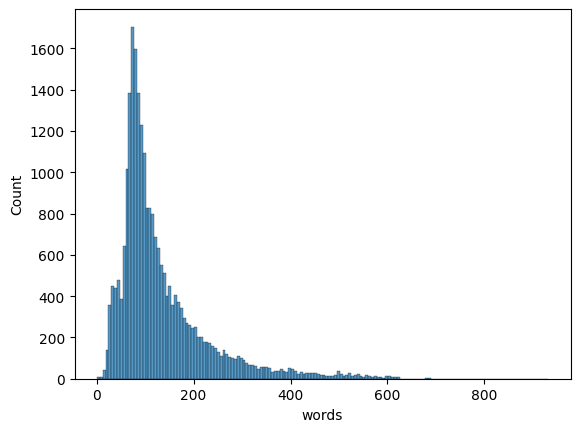

In [49]:
sb.histplot(A[A["target"]==0]["words"])

#### Comparison

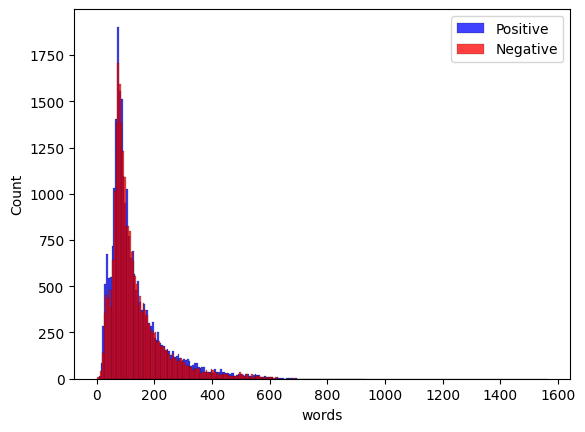

In [50]:
sb.histplot(A[A["target"]==1]["words"],color="blue")
sb.histplot(A[A["target"]==0]["words"],color="red")
plt.legend(("Positive","Negative"))

### <h2 style="background-color:yellow; color:Black;">The distribution of the words under both the sentiment seems to be nearly equivalent</h2>

### Distribution of positive and negative words

#### Under Positive Sentiment

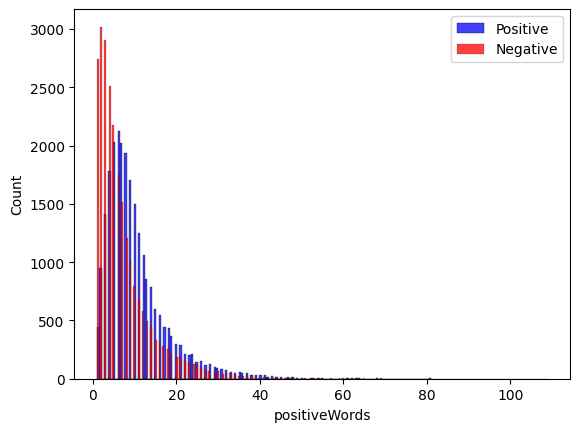

In [51]:
sb.histplot(A[A["target"]==1]["positiveWords"],color="blue")
sb.histplot(A[A["target"]==1]["negativeWords"],color="red")
plt.legend(("Positive","Negative"))

#### <h2 style="background-color:yellow; color:Black;">The distribution of the positive words under the positive sentiment is slightly more than the distribution of negative words</h2>

#### Under Negative Sentiment

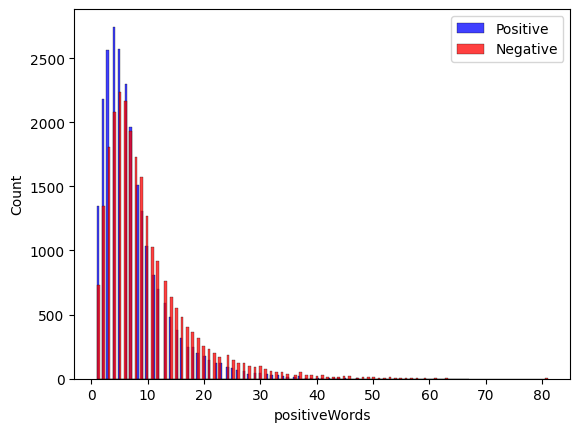

In [52]:
sb.histplot(A[A["target"]==0]["positiveWords"],color="blue")
sb.histplot(A[A["target"]==0]["negativeWords"],color="red")
plt.legend(("Positive","Negative"))

####  <h2 style="background-color:yellow; color:Black;">The distribution of the negative words under the negaitive sentiment is slightly more than the distribution of positive words</h2>

## Dividing Data

In [86]:
xh=A[["positiveWords","negativeWords","characters","words"]]
yh=A["target"]

In [87]:
from sklearn.model_selection import train_test_split
xtrh,xtsh,ytrh,ytsh=train_test_split(xh,yh,test_size=0.2,random_state=21)

In [90]:
xtrh.head()

,positiveWords,negativeWords,characters,words
26711,8,1,601,103
40268,7,24,1033,151
10903,4,7,545,84
15390,8,12,1425,222
36944,13,2,414,73


## i) Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0,solver='lbfgs',max_iter=800)
from hiteshmodule import mfit_classifier
mfit_classifier(lr,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.6988225208643252
Testing accuracy-- 0.7024001613553852
Recall-- 0.7108898821617229
MCC-- 0.40495126467048453


## ii) Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=88)
mfit_classifier(rfc,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.9963188018456418
Testing accuracy-- 0.6710367083501412
Recall-- 0.6783909440064686
MCC-- 0.3421382695308922


## iii) AdaBoost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=10)
mfit_classifier(abc,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.7632939159375709
Testing accuracy-- 0.6811214199273901
Recall-- 0.6943113148572619
MCC-- 0.36291093929423696


## iv) Naive bayes Classifiers

### Bernoulli Naive Bayes

In [57]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
mfit_classifier(bnb,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.5005925216207358
Testing accuracy-- 0.5069584509883017
Recall-- 0.5069584509883017
MCC-- 0.0


### Multinomial Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=2)
mfit_classifier(mnb,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.6957716648596859
Testing accuracy-- 0.6958450988301734
Recall-- 0.6944498162831174
MCC-- 0.3914916368090819


## v) Support Vector Machine Classifier

In [59]:
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=4)
mfit_classifier(svc,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.6136254759083231
Testing accuracy-- 0.6100242033077854
Recall-- 0.7914572864321608
MCC-- 0.2851360007948485


## vi) XGBoost Classifier

In [60]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
mfit_classifier(xgb,xtrh,xtsh,ytrh,ytsh)

Training accuracy-- 0.7531580141700915
Testing accuracy-- 0.7079467527228721
Recall-- 0.7181166837256909
MCC-- 0.4161838283085271


## <h2 style="background-color:yellow; color:Black;">Highest Accuracy of 70.8% was acheieved by XGBoost. Not acheived very good accuracy</h2>

# *Count Vectorization method*  (BOW)

In [46]:
A

,review,sentiment,characters,words,target
0,one reviewers mentioned watching 1 oz episode ...,positive,1185,186,1
1,wonderful little production. filming technique...,positive,668,93,1
2,thought wonderful way spend time hot summer we...,positive,601,96,1
3,basically theres family little boy jake thinks...,negative,475,73,0
4,"petter matteis ""love time money"" visually stun...",positive,880,136,1
...,...,...,...,...,...
49995,thought movie right good job. wasnt creative o...,positive,567,95,1
49996,bad plot bad dialogue bad acting idiotic direc...,negative,406,60,0
49997,catholic taught parochial elementary schools n...,negative,843,129,0
49998,im going disagree previous comment side maltin...,negative,853,126,0


## Word Cloud

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
a=str(A[A["target"]==1]['review'])
wordcloud = WordCloud().generate(a)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

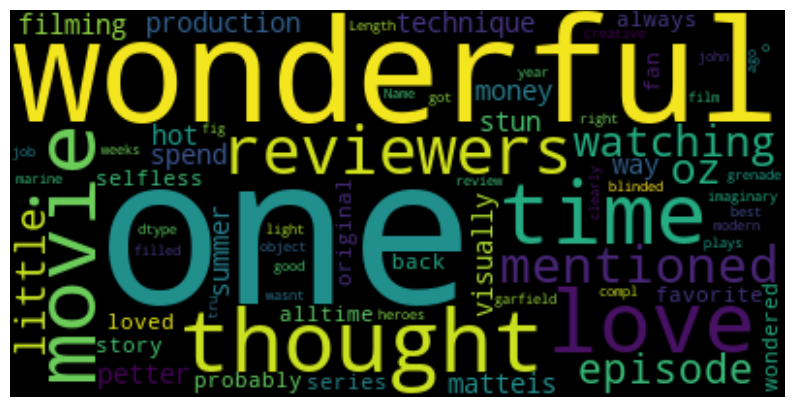

In [55]:
b=str(A[A["target"]==0]['review'])
wordcloud = WordCloud().generate(b)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

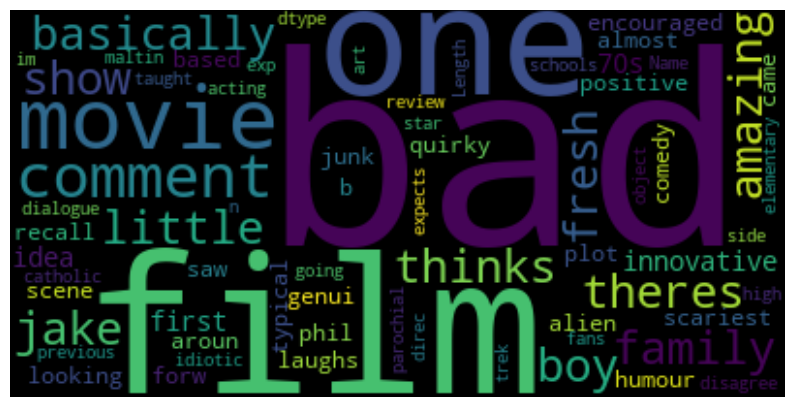

## Dividing Data

In [22]:
y=A['sentiment']
x=A['review']

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ynew=le.fit_transform(y)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
xnew=cv.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(xnew,ynew,test_size=0.2,random_state=21)

# Model Building

## i) Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0,solver='lbfgs',max_iter=800)

In [27]:
from hiteshmodule import mfit_classifier
mfit_classifier(lr,xtr,xts,ytr,yts)

Training accuracy-- 0.9975794861450795
Testing accuracy-- 0.8891690197660347
Recall-- 0.889837236998809
MCC-- 0.778290169042478


### Hyper parameter Tuning of logistic regression

In [29]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
tg={"C":[1,1.5],"penalty":["l1","l2"]}
gcv=GridSearchCV(lr,tg,cv=5)
lrg=gcv.fit(xtr,ytr)

In [30]:
lrg.best_params_

{'C': 1, 'penalty': 'l2'}

In [68]:
lr2=LogisticRegression(penalty="l2",C=1,solver="saga",max_iter=1000)
mfit_classifier(lr2,xtr,xts,ytr,yts)

Training accuracy-- 0.9862585411361287
Testing accuracy-- 0.8926986688180718
Recall-- 0.8922985547416353
MCC-- 0.7853505076177166


## ii) Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=88)
mfit_classifier(rfc,xtr,xts,ytr,yts)

Training accuracy-- 1.0
Testing accuracy-- 0.8615369100443727
Recall-- 0.8696883852691218
MCC-- 0.7231925342344997


## Hyper Parameter Tuning of random forest

In [52]:
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,50,1)}
dtc=RandomForestClassifier(random_state=21)
rgcv=GridSearchCV(dtc,tp,scoring="accuracy",cv=4)
rg=rgcv.fit(xtr,ytr)

In [53]:
rg.best_params_

{'max_depth': 45}

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=45,random_state=88)
mfit_classifier(rfc,xtr,xts,ytr,yts)

Training accuracy-- 0.971460985755704
Testing accuracy-- 0.8528788948270646
Recall-- 0.8398610843141038


## iii) AdaBoost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=10)
mfit_classifier(abc,xtr,xts,ytr,yts)

Training accuracy-- 0.8852525150651773
Testing accuracy-- 0.7923557886244453
Recall-- 0.7857142857142857
MCC-- 0.5847685463136802


## iv) Naive bayes Classifiers

### Bernoulli Naive Bayes 

In [71]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB(alpha=1.1)
mfit_classifier(bnb,xtr,xts,ytr,yts)

Training accuracy-- 0.9097854315322357
Testing accuracy-- 0.8557886244453409
Recall-- 0.8822529224229543
MCC-- 0.7132856729905368


### Multinomial Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=2)
mfit_classifier(mnb,xtr,xts,ytr,yts)

Training accuracy-- 0.9020196162476992
Testing accuracy-- 0.8572004840661557
Recall-- 0.876224213377787
MCC-- 0.7152844205877811


## v) Support Vector Machine Classifier

In [73]:
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=4)
mfit_classifier(svc,xtr,xts,ytr,yts)

Training accuracy-- 1.0
Testing accuracy-- 0.8697055264219443
Recall-- 0.8735747149429886
MCC-- 0.7393928531757255


## vi) XGBoost Classifier

In [74]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
mfit_classifier(xgb,xtr,xts,ytr,yts)

Training accuracy-- 0.9177025289327047
Testing accuracy-- 0.8657724889068172
Recall-- 0.8542944785276073
MCC-- 0.7318831561100606


## <h2 style="background-color:yellow; color:Black;">TThe higest accuracy in Count vectorization is 89.26% using Logistic Regression</h2>

# *TF-IDF method*

In [23]:
y1=A['sentiment']
x1=A['review']

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
yn=le.fit_transform(y1)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
xn=tfidf.fit_transform(x1)

In [26]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(xn,yn,test_size=0.2,random_state=21)

## Model Building

## i) Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1.0,solver='lbfgs',max_iter=800)

In [28]:
from hiteshmodule import mfit_classifier
mfit_classifier(lr,xtr,xts,ytr,yts)

Training accuracy-- 0.936587579738282
Testing accuracy-- 0.8982452601855587
Recall-- 0.8913128165173354
MCC-- 0.7965756402820302


### Hyper Parameter Tuning of logistic regression

In [39]:
from sklearn.model_selection import GridSearchCV
lr=LogisticRegression()
tg={"C":[1,1.5],"penalty":["l1","l2"]}
gcv=GridSearchCV(lr,tg,cv=5)
lrg=gcv.fit(xn,yn)

In [40]:
lrg.best_params_

{'C': 1.5, 'penalty': 'l2'}

In [29]:
lr1=LogisticRegression(penalty="l2",C=1.5,solver="saga",max_iter=1000)
model=lr1.fit(xtr,ytr)
from hiteshmodule import mfit_classifier
mfit_classifier(lr1,xtr,xts,ytr,yts)

Training accuracy-- 0.947379037341469
Testing accuracy-- 0.9008672851956434
Recall-- 0.894921875
MCC-- 0.8017855660644352


## ii) Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=100,max_features=100,random_state=8)
mfit_classifier(rfc,xtr,xts,ytr,yts)

Training accuracy-- 0.9957641007538892
Testing accuracy-- 0.8424768051633723
Recall-- 0.8327251776454773
MCC-- 0.6851855957794409


## iii) AdaBoost Classifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=10)
mfit_classifier(abc,xtr,xts,ytr,yts)

Training accuracy-- 0.895161493658758
Testing accuracy-- 0.7721863654699476
Recall-- 0.7659492697924674
MCC-- 0.5444054052825944


## iv) Naive Bayes Classifier

### Bernoulli Naive Bayes

In [84]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB(alpha=1.9)
mfit_classifier(bnb,xtr,xts,ytr,yts)

Training accuracy-- 0.9003302992864527
Testing accuracy-- 0.8544776119402985
Recall-- 0.8825789923142613
MCC-- 0.7108794610302513


### Multinomial Naive Bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=9)
mfit_classifier(mnb,xtr,xts,ytr,yts)

Training accuracy-- 0.8816973853407629
Testing accuracy-- 0.859318273497378
Recall-- 0.9007060900264784
MCC-- 0.7225741897279838


## v) Support Vector Machine

In [86]:
from sklearn.svm import LinearSVC
svc=LinearSVC(penalty="l2",max_iter=100000,random_state=5)
mfit_classifier(svc,xtr,xts,ytr,yts)

Training accuracy-- 0.9916038425657446
Testing accuracy-- 0.9006655909640984
Recall-- 0.8989340702724042
MCC-- 0.8012957424663455


## vi) XGBoost Classifier

In [87]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
mfit_classifier(xgbc,xtr,xts,ytr,yts)

Training accuracy-- 0.927334156980409
Testing accuracy-- 0.863654699475595
Recall-- 0.8516746411483254
MCC-- 0.72768625037016


# <h2 style="background-color:yellow; color:Black;">The higest accuracy in TF-IDF method is 90.08% using Logistic Regression</h2>

# *CV-TFIDF Method*

In [88]:
y=A['sentiment']
x=A['review']

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ynew=le.fit_transform(y)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
xnew=cv.fit_transform(x)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf1=TfidfTransformer()
xnew1=tfidf1.fit_transform(xnew)
xtr1,xts1,ytr1,yts1=train_test_split(xnew1,ynew,test_size=0.2,random_state=21)

## i) Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(penalty="l2",C=1.5,solver="saga",max_iter=1000)
from hiteshmodule import mfit_classifier
mfit_classifier(lr1,xtr,xts,ytr,yts)

Training accuracy-- 0.9467991225637276
Testing accuracy-- 0.905304558289633
Recall-- 0.8964299725382503
MCC-- 0.8108101558124469


## ii) Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=100,max_features=100,random_state=8)
mfit_classifier(rfc,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.9957641007538892
Testing accuracy-- 0.8424768051633723
Recall-- 0.8327251776454773
MCC-- 0.6851855957794409


## iii) AdaBoost Classifier

In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=10)
mfit_classifier(abc,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.8918332871082424
Testing accuracy-- 0.7795482049213392
Recall-- 0.7771707317073171
MCC-- 0.5589989465078333


## iv) Naive Bayes Classifier

### Bernoulli Naive Bayes

In [96]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB(alpha=1.9)
mfit_classifier(bnb,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.9003302992864527
Testing accuracy-- 0.8544776119402985
Recall-- 0.8825789923142613
MCC-- 0.7108794610302513


### Multinomial Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=9)
mfit_classifier(mnb,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.8816973853407629
Testing accuracy-- 0.859318273497378
Recall-- 0.9007060900264784
MCC-- 0.7225741897279838


## v) Support Vector Machine

In [98]:
from sklearn.svm import LinearSVC
svc=LinearSVC(penalty="l2",max_iter=100000,random_state=5)
mfit_classifier(svc,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.9916038425657446
Testing accuracy-- 0.9006655909640984
Recall-- 0.8989340702724042
MCC-- 0.8012957424663455


## vi) XGBoost Classifier

In [99]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
mfit_classifier(xgbc,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.927334156980409
Testing accuracy-- 0.863654699475595
Recall-- 0.8516746411483254
MCC-- 0.72768625037016


## <h2 style="background-color:yellow; color:Black;">The higest accuracy in CV-TFIDF method is 90.51% using Support Vector Machine</h2>

In [114]:
result = {'Algorithm':['Logistic Regression','Random Forest Classifier','AdaBoost Classifier','Bernoulli Naive Bayes','Multinomial Naive Bayes','SVC','XGBoost'],
          'Testing Accuracy-Hr':[0.7024,0.6710,0.6811,0.5070,0.6958,0.6100,0.7079],
          'Recall-Hr':[0.7109,0.6784,0.6943,0.5070,0.6944,0.7915,0.7181],
          'MCC-Hr':[0.4049,0.3421,0.3629,0,0.3914,0.2851,0.4161],
         'Testing Accuracy-CV':[0.8927,0.8615,0.7924,0.8558,0.8572,0.8697,0.8658],
         'Recall-CV':[0.8923,0.8697,0.7857,0.8823,0.8762,0.8736,0.8543],
          'MCC-CV':[0.7854, 0.7232,0.5848,0.7133,0.7153,0.7394,0.7319],
         'Testing Accuracy-TFIDF':[0.9009,0.8425,0.7722,0.8545,0.8593,0.9007,0.8637],
         'Recall-TFIDF':[0.8949,0.8327,0.7659,0.8826,0.9007,0.8989,0.8517],
          'MCC-TFIDF':[0.8018,0.6852,0.5444,0.7109,0.7226,0.8013,0.7277],
         'Testing Accuracy-CV-TFIDF':[0.9053,0.8425,0.7795,0.8545,0.8593,0.9007,0.8637],
         'Recall-CV-TFIDF':[0.8964,0.8327,0.7771,0.8826,0.9007,0.8989,0.8517],
         "MCC-CV-TFIDF":[0.8108,0.6852,0.5590,0.7109,0.7226,0.8013,0.7277]}
s = pd.DataFrame(result)

# Result

In [115]:
s

,Algorithm,Testing Accuracy-Hr,Recall-Hr,MCC-Hr,Testing Accuracy-CV,Recall-CV,MCC-CV,Testing Accuracy-TFIDF,Recall-TFIDF,MCC-TFIDF,Testing Accuracy-CV-TFIDF,Recall-CV-TFIDF,MCC-CV-TFIDF
0,Logistic Regression,0.7024,0.7109,0.4049,0.8927,0.8923,0.7854,0.9009,0.8949,0.8018,0.9053,0.8964,0.8108
1,Random Forest Classifier,0.6710,0.6784,0.3421,0.8615,0.8697,0.7232,0.8425,0.8327,0.6852,0.8425,0.8327,0.6852
2,AdaBoost Classifier,0.6811,0.6943,0.3629,0.7924,0.7857,0.5848,0.7722,0.7659,0.5444,0.7795,0.7771,0.5590
3,Bernoulli Naive Bayes,0.5070,0.5070,0.0000,0.8558,0.8823,0.7133,0.8545,0.8826,0.7109,0.8545,0.8826,0.7109
4,Multinomial Naive Bayes,0.6958,0.6944,0.3914,0.8572,0.8762,0.7153,0.8593,0.9007,0.7226,0.8593,0.9007,0.7226
5,SVC,0.6100,0.7915,0.2851,0.8697,0.8736,0.7394,0.9007,0.8989,0.8013,0.9007,0.8989,0.8013
6,XGBoost,0.7079,0.7181,0.4161,0.8658,0.8543,0.7319,0.8637,0.8517,0.7277,0.8637,0.8517,0.7277


In [116]:
s.to_csv("C:Desktop/RESULT.csv")

# Stacking 

In [107]:
from sklearn.ensemble import StackingClassifier

In [119]:
e=[("lr",lr),("bnb",bnb),("mnb",mnb),("xgbc",xgbc),("svc",svc),("rfc",rfc)]
stack=StackingClassifier(estimators=e,final_estimator=LinearSVC())

In [120]:
mfit_classifier(stack,xtr1,xts1,ytr1,yts1)

Training accuracy-- 0.9675499861324727
Testing accuracy-- 0.9110528438886648
Recall-- 0.9075362895207795
MCC-- 0.8221324036738435


## <h2 style="background-color:yellow; color:Black;">The higest accuracy of 91.11% is achieved through stacking different classification models</h2>

# PREDICTING MODEL

In [112]:
a=input("Type your opinion about a Product:")
from hiteshmodule import TextPrePredict
x=TextPrePredict(a)
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
xp=tfidf.transform([x])
model=lr1.fit(xn,yn)
o=le.inverse_transform(model.predict(xp))[0]
if(o=='positive'):
    print("--------------------> you have",o,"thought about this product it seems you liked it so much <---------------------------")
else:
    print("--------------------> you have negative thought about this product. Sorry to hear that <--------------------------------")

Type your opinion about a Product:it was good
--------------------> you have positive thought about this product it seems you liked it so much <---------------------------


In [30]:
def SentimentModel(xtest):
    from hiteshmodule import TextPreprocessing
    x=TextPreprocessing(xtest)
    from sklearn.feature_extraction.text import TfidfVectorizer
    xp=tfidf.transform(x)
    b=le.inverse_transform(model.predict(xp))
    p=[]
    n=[]
    for i in b:
        if(i=="positive"):
            p.append(i)
        else:
            n.append(i)
    print("------Number of Positive reviews ------> ",len(p))
    print("------Number of Negative reviews ------> ",len(n))
    p.extend(n)
    new=pd.DataFrame(p,columns=["Predicted"])
    return new.Predicted.value_counts().plot(kind="bar")
    

#  Product Analyzer

In [31]:
import pandas as pd
import requests
from requests import get
from bs4 import BeautifulSoup
from pathlib import Path

## Takes link of a product on amazon shopping website as input and analyzes the sentiment of customers about that product based on all the text reviews


In [159]:
url = "https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B09SH9D45B/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
review = []
page_number = 1

while True:
    page_url = f'{url}/#customerReviews&pageNumber={page_number}'
    page = requests.get(page_url)
    soup = BeautifulSoup(page.content)
    review_bodies = [review.text for review in soup.select('span.a-size-base.review-text.review-text-content')]
    review_stars = [review.text for review in soup.select('span.a-icon-alt')]
    
    if not review_bodies:
        break

    for Reviews, Stars in zip(review_bodies, review_stars):
        review.append((Reviews,Stars))

    page_number = page_number + 1

A = pd.DataFrame(review, columns=['Reviews', 'Stars'])
desktop_path = Path.home() / "Desktop"
file_path = desktop_path / 'Amazon.csv'
A.to_csv(file_path, index=False)

In [160]:
xp=A.Reviews

In [161]:
xp

0     \nPro:Samsung Galaxy S series offers the best ...
1     \nPositives1.performance2.speakers and sound q...
2     \nI would like to divide my review in below me...
3     \n\n\n\n\n                    The media could ...
4     \nThe phone gets very hot,only if we watch som...
5     \nNice flagship phone, camera quality is aweso...
6     \nBattery life is not that goodFingerprint sca...
7     \nI was looking for a phone that fits my small...
8     \nPhone is ok ok but quality of camera is awes...
9     \nBattery life degrades very quickly once you ...
10    \nPro:Samsung Galaxy S series offers the best ...
11    \nPositives1.performance2.speakers and sound q...
12    \nI would like to divide my review in below me...
13    \n\n\n\n\n                    The media could ...
14    \nThe phone gets very hot,only if we watch som...
15    \nNice flagship phone, camera quality is aweso...
16    \nBattery life is not that goodFingerprint sca...
17    \nI was looking for a phone that fits my s

All the basic preprocessing that are required such as lowercasing, removing tags, removing URL, reomving punctuations,
removing english stop words are performed.
------Number of Positive reviews ------>  14
------Number of Negative reviews ------>  6


<Axes: >

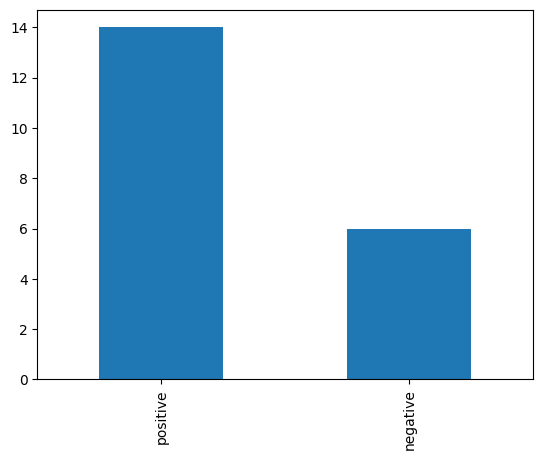

In [162]:
SentimentModel(xp)

## Product Analyzer Function

In [32]:
def Amazon_MODEL():
    a=input("Enter the link of a product:-" )
    url = a
    review = []
    page_number = 1
    import requests
    from requests import get
    import requests
    from bs4 import BeautifulSoup

    while True:
        page_url = f'{url}/#customerReviews&pageNumber={page_number}'
        page = requests.get(page_url)
        soup = BeautifulSoup(page.content)
        review_bodies = [review.text for review in soup.select('span.a-size-base.review-text.review-text-content')]
        review_stars = [review.text for review in soup.select('span.a-icon-alt')]

        if not review_bodies:
            break

        for Reviews, Stars in zip(review_bodies, review_stars):
            review.append((Reviews,Stars))

        page_number = page_number + 1

    A = pd.DataFrame(review, columns=['Reviews', 'Stars'])
    xp=A.Reviews
    xp
    SentimentModel(xp)

In [33]:
def IMDBmodel():
    a=input("Enter the link of a product:-" )
    url = a
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    from bs4 import BeautifulSoup

    driver = webdriver.Chrome()
    driver.get(url)
    
    while True:
        try:
            load_more_button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, "//div[@class='load-more-data']"))
            )
            load_more_button.click()
        except:
            break

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    reviews = []
    for review in soup.find_all('div', {'class': 'text show-more__control'}):
        reviews.append(review.text.strip())

    driver.quit()
    A=pd.DataFrame(reviews,columns=["text"])
    xp=A.text
    xp
    SentimentModel(xp)

## Redmi 11 prime

Enter the link of a product:-https://www.amazon.in/Redmi-Flashy-Storage-Design-Performance/product-reviews/B0BBH1X5K4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
All the basic preprocessing that are required such as lowercasing, removing tags, removing URL, reomving punctuations,
removing english stop words are performed.
------Number of Positive reviews ------>  40
------Number of Negative reviews ------>  40


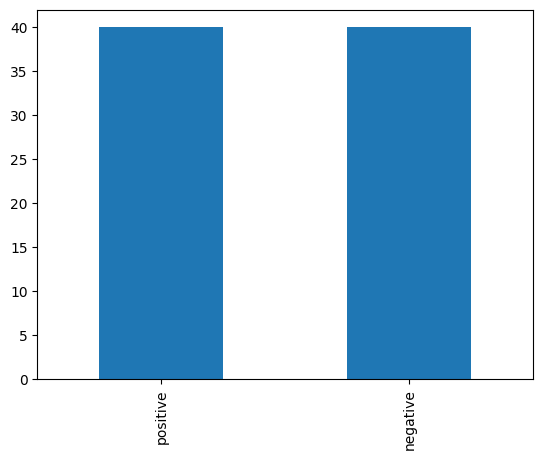

In [147]:
Amazon_MODEL()

## I Phone 14 pro max

Enter the link of a product:-https://www.amazon.in/Apple-iPhone-256GB-Deep-Purple/product-reviews/B0BDK2FB2T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
All the basic preprocessing that are required such as lowercasing, removing tags, removing URL, reomving punctuations,
removing english stop words are performed.
------Number of Positive reviews ------>  9
------Number of Negative reviews ------>  1


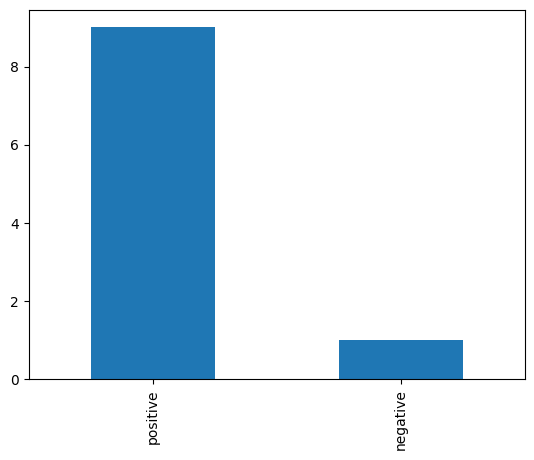

In [44]:
Amazon_MODEL()

## Adipurush

Enter the link of a product:-https://www.imdb.com/title/tt12915716/reviews/?ref_=tt_ql_2
All the basic preprocessing that are required such as lowercasing, removing tags, removing URL, reomving punctuations,
removing english stop words are performed.
------Number of Positive reviews ------>  65
------Number of Negative reviews ------>  299


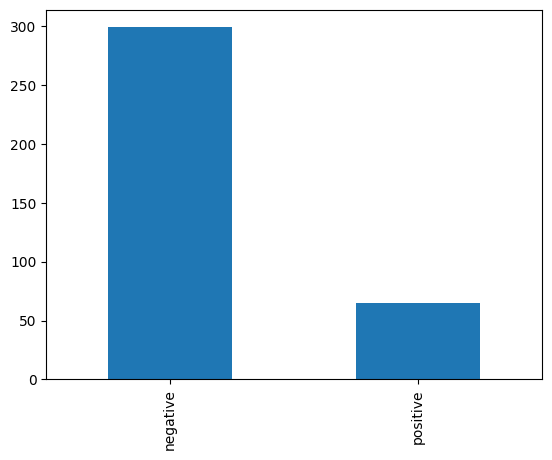

In [40]:
IMDBmodel()

## Avengers Endgame

Enter the link of a product:-https://www.imdb.com/title/tt4154796/reviews/?ref_=tt_ql_2
All the basic preprocessing that are required such as lowercasing, removing tags, removing URL, reomving punctuations,
removing english stop words are performed.
------Number of Positive reviews ------>  6294
------Number of Negative reviews ------>  2491


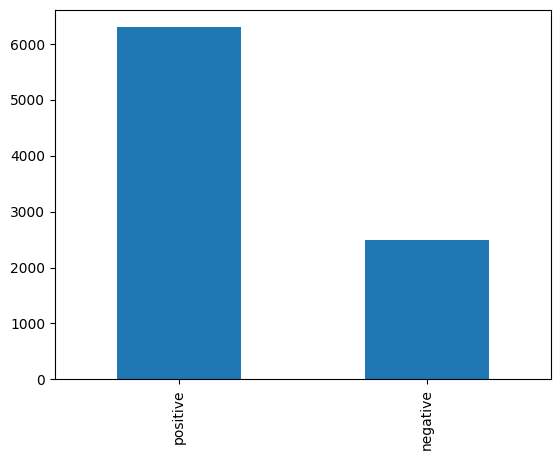

In [34]:
IMDBmodel()